# Impact of FS6 Editing on Regional Volumes
Summarize changes to aseg and aparc volumes following editing
Mike Tyszka | Caltech | 2020-06-15

Updated with reprocessed data and added cortical thickness measures | Dorit Kliemann | 2020-06-18

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Utility functions
def parse_subj_editor(df, colname):
    
    # Not pythonic/pandaish but it works
    for index, row in df.iterrows():

        subject_editor = row[colname]
        bits = subject_editor.split('-')
        df.at[index, 'Subject'] = bits[0] + '-' + bits[1]
        df.at[index, 'Editor'] = bits[2]
        
    return df

In [7]:
cd stats

/Users/doritkliemann/Desktop/conte_fs/stats


In [8]:
# Load original aseg and aparc volumes and aparc thickness
aseg_orig = pd.read_csv('orig_aseg_stats.tsv', sep='\t')
aseg_orig['Subject'] = aseg_orig['Measure:volume']
aseg_orig['Editor'] = 'Original'

aparc_lh_orig = pd.read_csv('orig_aparc_stats_lh.tsv', sep='\t')
aparc_lh_orig['Subject'] = aparc_lh_orig['lh.aparc.volume']
aparc_lh_orig['Editor'] = 'Original'

aparc_rh_orig = pd.read_csv('orig_aparc_stats_rh.tsv', sep='\t')
aparc_rh_orig['Subject'] = aparc_rh_orig['rh.aparc.volume']
aparc_rh_orig['Editor'] = 'Original'

aparcT_lh_orig = pd.read_csv('orig_aparc_stats_thickness_lh.tsv', sep='\t')
aparcT_lh_orig['Subject'] = aparcT_lh_orig['lh.aparc.thickness']
aparcT_lh_orig['Editor'] = 'Original'

aparcT_rh_orig = pd.read_csv('orig_aparc_stats_thickness_rh.tsv', sep='\t')
aparcT_rh_orig['Subject'] = aparcT_rh_orig['rh.aparc.thickness'] 
aparcT_rh_orig['Editor'] = 'Original'

In [10]:
# Load edited aseg and aparc volumes and thickness
aseg_edit = pd.read_csv('edit_aseg_stats.tsv', sep='\t')
aseg_edit = parse_subj_editor(aseg_edit, 'Measure:volume')

aparc_lh_edit = pd.read_csv('edit_aparc_stats_lh.tsv', sep='\t')
aparc_lh_edit = parse_subj_editor(aparc_lh_edit, 'lh.aparc.volume')

aparc_rh_edit = pd.read_csv('edit_aparc_stats_rh.tsv', sep='\t')
aparc_rh_edit = parse_subj_editor(aparc_rh_edit, 'rh.aparc.volume')

aparcT_lh_edit = pd.read_csv('edit_aparc_stats_thickness_lh.tsv', sep='\t')
aparcT_lh_edit = parse_subj_editor(aparcT_lh_edit, 'lh.aparc.thickness')

aparcT_rh_edit = pd.read_csv('edit_aparc_stats_thickness_rh.tsv', sep='\t')
aparcT_rh_edit = parse_subj_editor(aparcT_rh_edit, 'rh.aparc.thickness')


In [11]:
# Extract unique editor and subject lists
editors = np.unique(aseg_edit['Editor'])
subjects = np.unique(aseg_edit['Subject'])

## Cortical volume changes due to editing (aparc)

### Left Hemisphere

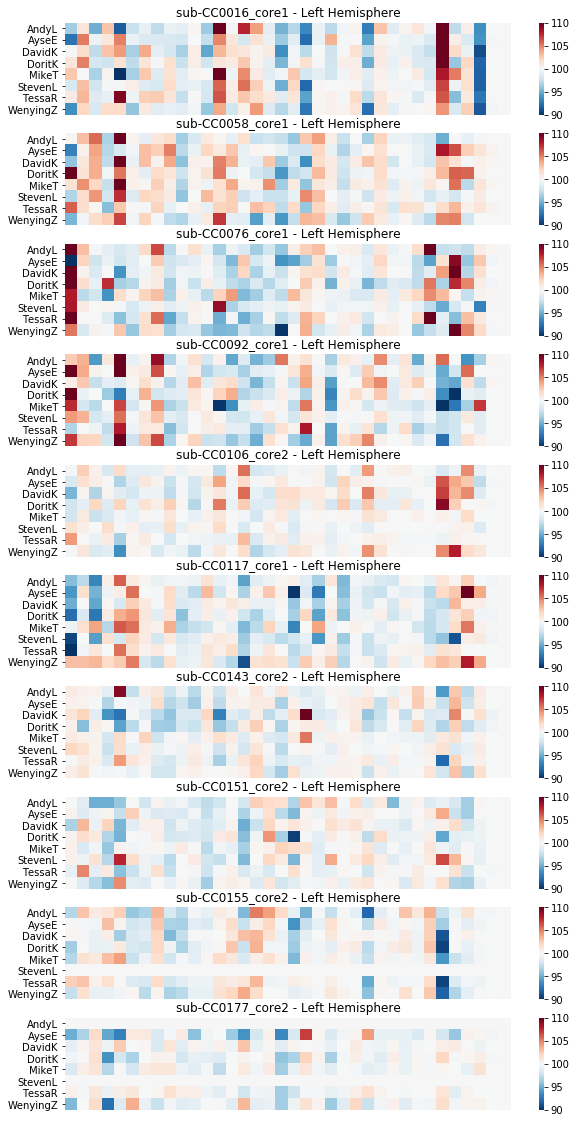

In [12]:
plt.figure(figsize=(10, 20))

# for subject in subjects:
for sc, subject in enumerate(subjects):

    df_orig = aparc_lh_orig[aparc_lh_orig.Subject.eq(subject)]
    
    # Extract volumes for all editors of a given subject
    df_edit = aparc_lh_edit[aparc_lh_edit.Subject.eq(subject)]
    
    # Percent change in volume from original
    df_norm = df_edit.iloc[:, 1:37] / df_orig.iloc[:, 1:37].values * 100.0
    
    plt.subplot(10, 1, sc+1)
    plt.title(subject + ' - Left Hemisphere')
    sns.heatmap(df_norm,
                vmin=90.0,
                vmax=110.0,
                cmap=sns.color_palette("RdBu_r", n_colors=128),
                xticklabels=[],
                yticklabels=df_edit['Editor'],
                annot=False)

### Right Hemisphere

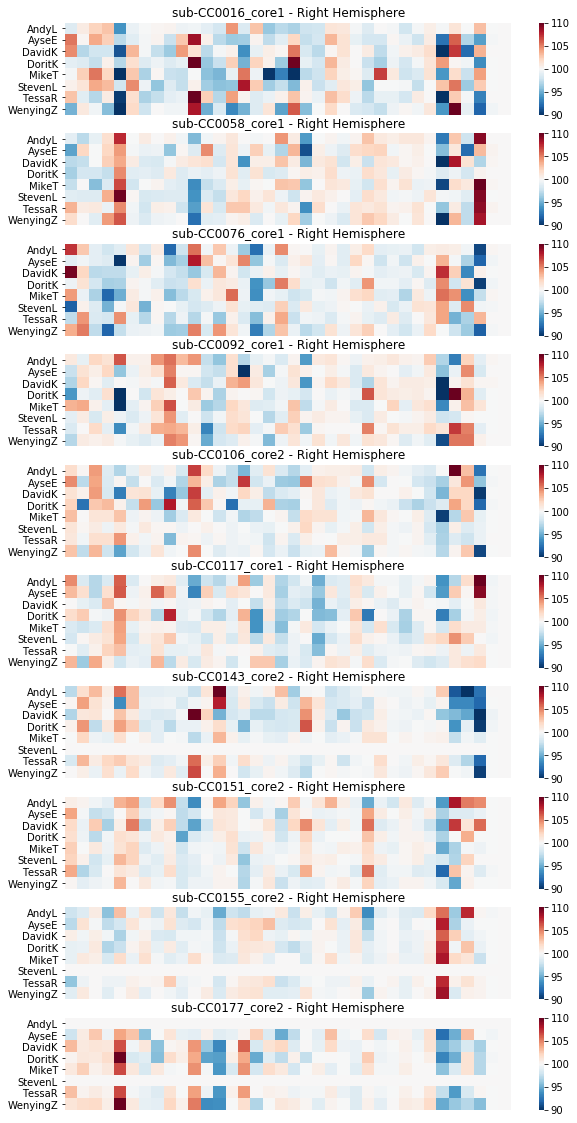

In [13]:
plt.figure(figsize=(10, 20))

for sc, subject in enumerate(subjects):

    df_orig = aparc_rh_orig[aparc_rh_orig.Subject.eq(subject)]
    
    # Extract volumes for all editors of a given subject
    df_edit = aparc_rh_edit[aparc_rh_edit.Subject.eq(subject)]
    
    # Percent change in volume from original
    df_norm = df_edit.iloc[:, 1:37] / df_orig.iloc[:, 1:37].values * 100.0
    
    plt.subplot(10, 1, sc+1)
    plt.title(subject + ' - Right Hemisphere')
    sns.heatmap(df_norm,
                vmin=90.0,
                vmax=110.0,
                cmap=sns.color_palette("RdBu_r", n_colors=128),
                xticklabels=[],
                yticklabels=df_edit['Editor'],
                annot=False)

## Subcortical volume changes due to editing (aseg)

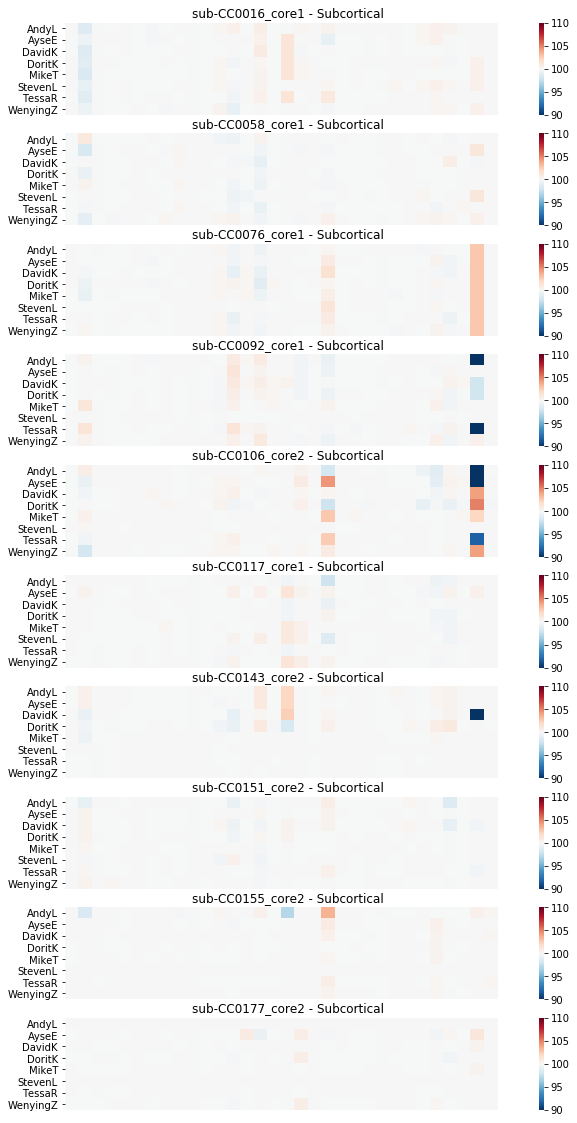

In [14]:
plt.figure(figsize=(10, 20))

for sc, subject in enumerate(subjects):

    df_orig = aseg_orig[aseg_orig.Subject.eq(subject)]
    
    # Extract volumes for all editors of a given subject
    df_edit = aseg_edit[aseg_edit.Subject.eq(subject)]
    
    # Percent change in volume from original
    df_norm = df_edit.iloc[:, 1:34] / df_orig.iloc[:, 1:34].values * 100.0
    
    plt.subplot(10, 1, sc+1)
    plt.title(subject + ' - Subcortical')
    sns.heatmap(df_norm,
                vmin=90.0,
                vmax=110.0,
                cmap=sns.color_palette("RdBu_r", n_colors=128),
                xticklabels=[],
                yticklabels=df_edit['Editor'],
                annot=False)

# additional aseg measures [ 41-67]

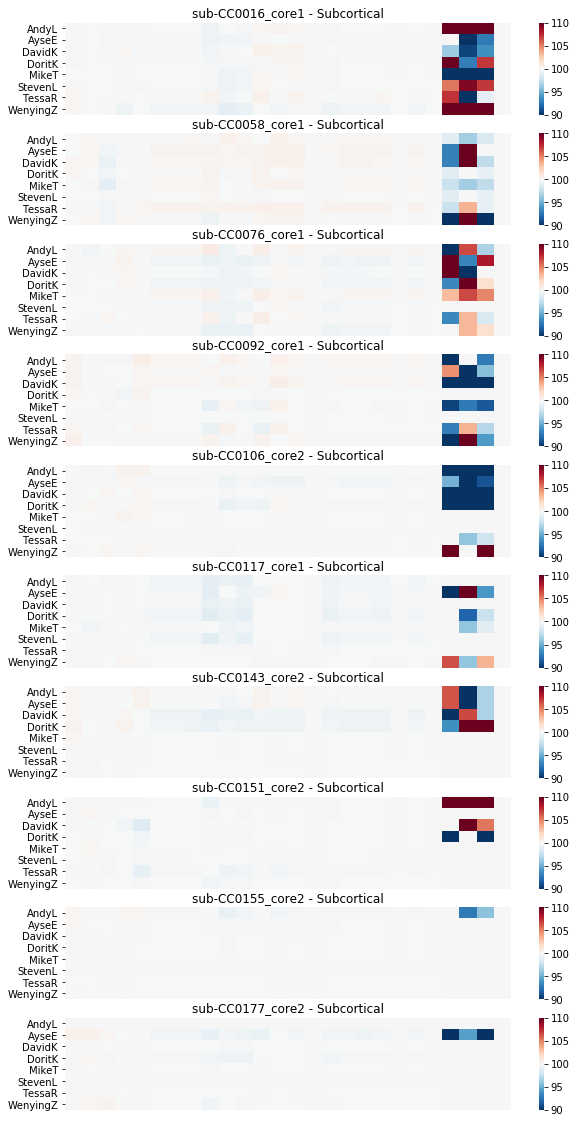

In [17]:
plt.figure(figsize=(10, 20))

for sc, subject in enumerate(subjects):

    df_orig = aseg_orig[aseg_orig.Subject.eq(subject)]
    
    # Extract volumes for all editors of a given subject
    df_edit = aseg_edit[aseg_edit.Subject.eq(subject)]
    
    # Percent change in volume from original
    df_norm = df_edit.iloc[:, 41:67] / df_orig.iloc[:, 41:67].values * 100.0
    
    plt.subplot(10, 1, sc+1)
    plt.title(subject + ' - Subcortical')
    sns.heatmap(df_norm,
                vmin=90.0,
                vmax=110.0,
                cmap=sns.color_palette("RdBu_r", n_colors=128),
                xticklabels=[],
                yticklabels=df_edit['Editor'],
                annot=False)

## Cortical thickness changes due to editing (aparc)

### Left Hemisphere

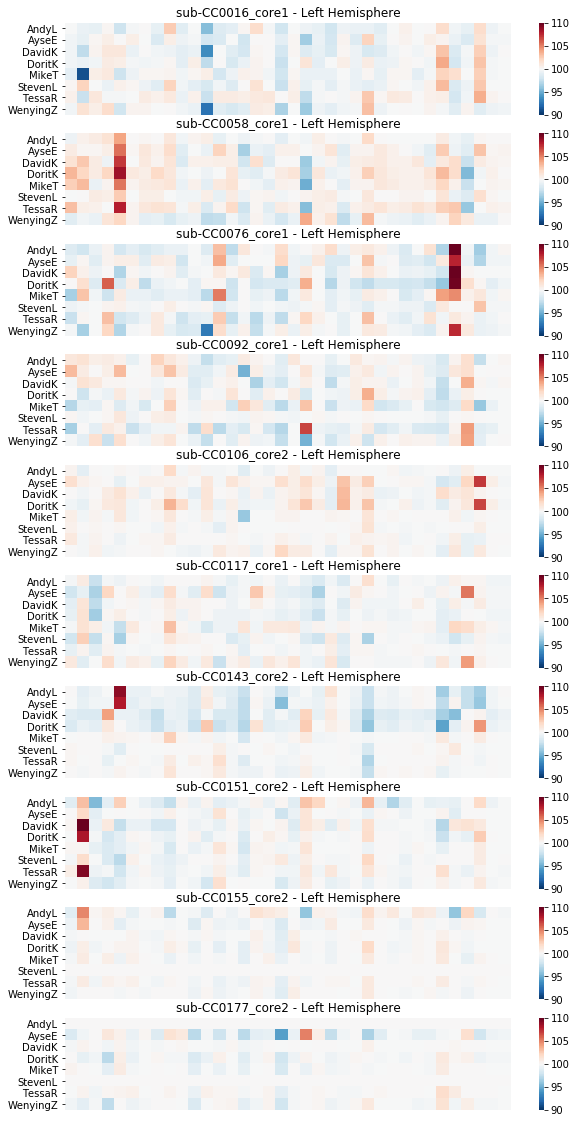

In [19]:
plt.figure(figsize=(10, 20))

# for subject in subjects:
for sc, subject in enumerate(subjects):

    df_orig = aparcT_lh_orig[aparcT_lh_orig.Subject.eq(subject)]
    
    # Extract volumes for all editors of a given subject
    df_edit = aparcT_lh_edit[aparcT_lh_edit.Subject.eq(subject)]
    
    # Percent change in volume from original
    df_norm = df_edit.iloc[:, 1:37] / df_orig.iloc[:, 1:37].values * 100.0
    
    plt.subplot(10, 1, sc+1)
    plt.title(subject + ' - Left Hemisphere')
    sns.heatmap(df_norm,
                vmin=90.0,
                vmax=110.0,
                cmap=sns.color_palette("RdBu_r", n_colors=128),
                xticklabels=[],
                yticklabels=df_edit['Editor'],
                annot=False)

### Right Hemisphere

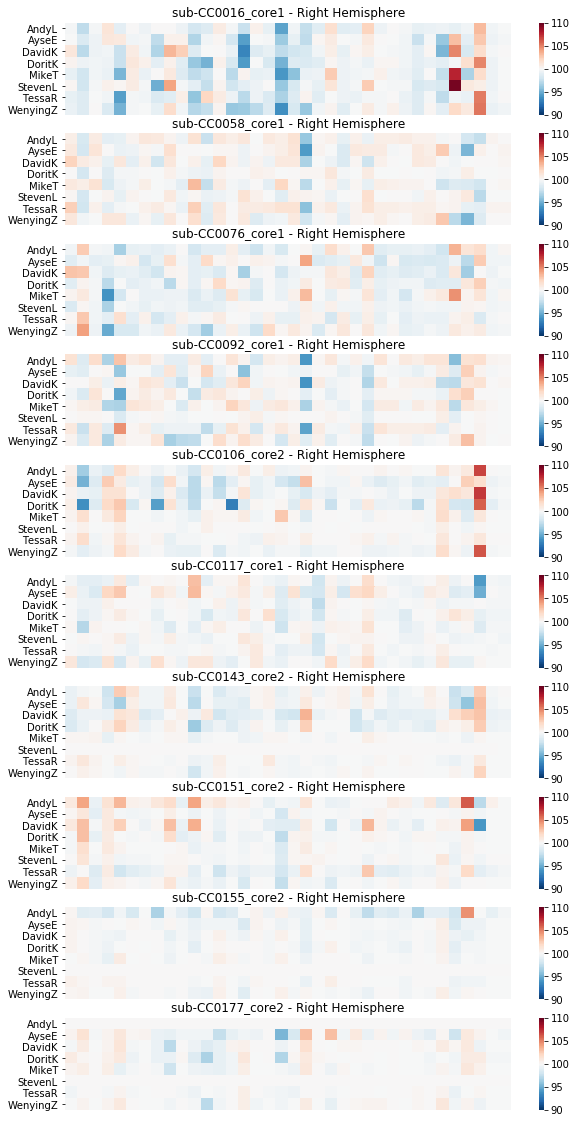

In [30]:
plt.figure(figsize=(10, 20))

for sc, subject in enumerate(subjects):

    df_orig = aparcT_rh_orig[aparcT_rh_orig.Subject.eq(subject)]
    
    # Extract volumes for all editors of a given subject
    df_edit = aparcT_rh_edit[aparcT_rh_edit.Subject.eq(subject)]
    
    # Percent change in volume from original
    df_norm = df_edit.iloc[:, 1:37] / df_orig.iloc[:, 1:37].values * 100.0
    
    plt.subplot(10, 1, sc+1)
    plt.title(subject + ' - Right Hemisphere')
    sns.heatmap(df_norm,
                vmin=90.0,
                vmax=110.0,
                cmap=sns.color_palette("RdBu_r", n_colors=128),
                xticklabels=[],
                yticklabels=df_edit['Editor'],
                annot=False)
    print

,rh_bankssts_thickness,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,...,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,100.119412,100.482750,99.955072,100.281561,100.502157,99.862738,100.016319,99.703540,99.165967,99.973656,...,99.995222,100.000000,100.000000,99.847381,100.360919,99.537815,100.540393,100.112146,99.950632,99.897577
std,0.396286,0.515622,0.081111,0.300186,0.775271,0.229631,0.184532,0.372193,1.043553,0.175874,...,0.177469,0.163484,0.261808,0.380367,0.428969,0.761693,0.515600,0.467251,0.062032,0.134411
min,99.656095,100.000000,99.800319,99.842850,99.083311,99.450952,99.869452,99.221239,97.230382,99.631191,...,99.579511,99.860075,99.436514,98.975975,99.918666,97.815126,99.956332,99.482402,99.819564,99.605159
25%,99.885365,100.038620,99.910144,100.000000,100.000000,99.734627,99.902089,99.309735,98.887956,99.920969,...,100.000000,99.906716,99.953043,99.803072,100.000000,99.488796,100.000000,99.870600,99.940275,99.869181
50%,100.000000,100.360453,100.000000,100.366684,100.687517,99.908492,99.978242,99.858407,99.454469,100.000000,...,100.019113,99.953358,100.000000,100.000000,100.284669,99.677871,100.611354,100.120773,99.965511,99.940786
75%,100.353458,100.772400,100.000000,100.458355,101.071717,100.000000,100.021758,100.000000,100.000000,100.065859,...,100.086009,100.011660,100.197220,100.078771,100.538837,100.000000,100.982533,100.431332,99.998107,99.993834
max,100.878869,101.441813,100.039936,100.680985,101.375034,100.183016,100.435161,100.106195,100.041964,100.210748,...,100.152905,100.373134,100.262960,100.118157,101.138674,100.280112,101.135371,100.793651,100.000000,100.000000


# Display stats of changes per subject

### cortical thickness Right Hemisphere

In [57]:
    df_orig = aparcT_rh_orig[aparcT_rh_orig.Subject.eq('sub-CC0177_core2')]
    
    # Extract volumes for all editors of a given subject
    df_edit = aparcT_rh_edit[aparcT_rh_edit.Subject.eq('sub-CC0177_core2')]
    
    # Percent change in volume from original
    df_norm = df_edit.iloc[:, 1:37] / df_orig.iloc[:, 1:37].values * 100.0
    df_norm
    

,rh_bankssts_thickness,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,...,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent
72,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
73,100.343905,101.441813,99.800319,100.366684,101.132381,100.183016,100.435161,99.221239,99.202686,99.631191,...,99.579511,100.373134,99.436514,98.975975,100.244002,97.815126,100.960699,100.414079,99.904945,99.605159
74,99.770730,100.926880,99.880192,100.366684,101.375034,99.743777,99.869452,99.256637,97.230382,100.052687,...,100.152905,99.860075,100.262960,100.078771,100.813339,100.280112,101.048035,99.482402,99.952052,99.926476
75,100.878869,100.308960,100.000000,100.576218,100.970612,99.450952,99.869452,99.327434,99.286614,100.210748,...,100.114679,99.906716,99.924869,99.684915,99.918666,99.551821,100.873362,100.793651,99.819564,99.814795
76,100.382117,100.720906,100.039936,100.680985,99.083311,99.816984,100.087032,99.787611,97.943768,99.947313,...,100.038226,99.906716,99.962434,99.842458,100.325336,99.775910,101.135371,100.483092,99.956678,99.955095
77,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
78,99.656095,100.051493,100.000000,99.842850,100.404422,99.707174,99.956484,100.106195,100.041964,99.841939,...,100.000000,100.046642,100.187829,100.078771,100.447336,99.299720,99.956332,100.241546,99.974344,99.991779
79,99.923577,100.411946,99.920128,100.419068,101.051496,100.000000,99.912968,99.929204,99.622325,100.105374,...,100.076453,99.906716,100.225394,100.118157,101.138674,99.579832,100.349345,99.482402,99.997476,99.887310


### cortical volume Right Hemisphere

In [60]:
    df_orig = aparc_rh_orig[aparc_rh_orig.Subject.eq('sub-CC0177_core2')]
    
    # Extract volumes for all editors of a given subject
    df_edit = aparc_rh_edit[aparc_rh_edit.Subject.eq('sub-CC0177_core2')]
    
    # Percent change in volume from original
    df_norm = df_edit.iloc[:, 1:37] / df_orig.iloc[:, 1:37].values * 100.0
    df_norm
    

,rh_bankssts_volume,rh_caudalanteriorcingulate_volume,rh_caudalmiddlefrontal_volume,rh_cuneus_volume,rh_entorhinal_volume,rh_fusiform_volume,rh_inferiorparietal_volume,rh_inferiortemporal_volume,rh_isthmuscingulate_volume,rh_lateraloccipital_volume,...,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,BrainSegVolNotVent,eTIV
72,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
73,97.944906,100.869061,102.721926,99.519231,103.986832,102.853371,95.927856,99.905941,101.311475,99.128433,...,100.516514,100.332433,99.176,101.705519,92.456480,95.152974,103.015682,99.917707,99.605159,100.0
74,103.148229,100.984936,101.326768,101.244344,106.437454,99.563363,101.218437,95.853582,100.255009,100.567341,...,99.980134,100.519427,99.664,101.491258,95.357834,96.493640,98.311218,96.639693,99.926476,100.0
75,100.393529,101.158749,101.080564,101.809955,114.520849,98.436231,98.765531,95.649788,101.748634,100.649564,...,99.751676,100.415541,99.976,100.694206,93.326886,95.118597,101.447527,97.037443,99.814795,100.0
76,101.049410,102.433372,100.615511,101.244344,106.583760,101.228676,98.316633,101.073836,99.817851,99.983555,...,99.731810,100.768751,100.016,100.128557,95.841393,98.521829,101.447527,97.064875,99.955095,100.0
77,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
78,103.060778,100.463499,100.916427,100.452489,106.693489,99.695370,99.310621,98.698856,101.530055,99.934221,...,99.865905,100.498649,100.040,101.362701,97.582205,94.224820,98.431846,100.178302,99.991779,100.0
79,101.399213,101.738123,101.887567,100.735294,111.119239,101.076361,99.158317,99.028061,102.076503,100.567341,...,100.079464,100.789528,100.632,101.894069,94.874275,96.149880,97.104946,95.707036,99.887310,100.0
